# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    if r>prob:
        return False
    else:
        return True



In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [4]:
def evolveOne(currentState, rules):
    final_state=currentState
    for i in rules:
        if i[0] == currentState:
            if has_transitioned(i[2]) == True:
                final_state=i[1]
    return final_state
        
    
    
    
    #if has_transitioned = True:
        
    # YOUR CODE HERE

In [5]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [6]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [7]:
def evolveMany(states, rules):
    newState = []
    for i in range (0,len(states)):
        new = evolveOne(states[i],rules)
        newState.append(new)
    return newState


In [8]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [52]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)
    
    A_count[0] = (state.count('A')) # this sets the first value of each count to the count at t=0
    B_count[0] = (state.count('B'))
    C_count[0] = (state.count('C'))
    for i in range(1,n_step+1): 
        state = evolveMany(state, rules) #this changes the atoms that have decayed into their new states

        A_count[i] = (state.count('A')) # this enter new values for the count in the count arrays
        B_count[i] = (state.count('B'))
        C_count[i] = (state.count('C'))

    return A_count, B_count, C_count
random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
print (r1,r2,r3)

[200 213 233 250 258 251 266 263 259 260 265 259 256 255 258 256 259 253
 249 247 253] [200 198 201 206 205 214 214 212 216 221 225 234 236 238 234 235 231 245
 253 256 252] [200 189 166 144 137 135 120 125 125 119 110 107 108 107 108 109 110 102
  98  97  95]


In [53]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

In [54]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




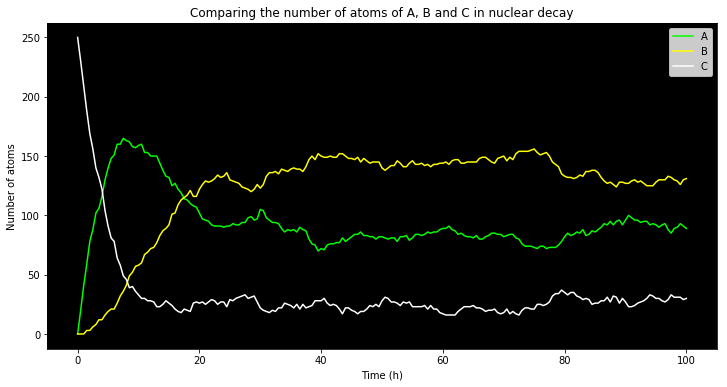

In [55]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2

dt = t_total/nsteps #this calculates the change in time
    
tauA= t_half_A/numpy.log(2)
tauB= t_half_B/numpy.log(2)
tauC=t_half_C/numpy.log(2)
    
B_prob = 1- numpy.exp(-dt/tauB) #this uses halflife to calculate probability of decay
C_prob = 1- numpy.exp(-dt/tauC)
A_prob=1-numpy.exp(-dt/tauA)

rules = [('A', 'B', A_prob),
    ('B', 'C', B_prob),
    ('C', 'A', C_prob)]
A, B, C = evolve_system(0,0,250,rules, nsteps)
ts = numpy.linspace(0,100,nsteps+1)

plt.figure(figsize=(12, 6)) #this defines the size of the graph
plt.plot(ts,A, '#00FF00', label='A') #these plot the number of different elements
plt.plot(ts,B, 'yellow', label='B') 
plt.plot(ts,C, 'white', label='C') #nuclear colours
plt.legend() # this calls the legend
plt.title('Comparing the number of atoms of A, B and C in nuclear decay') #this adds a title
plt.xlabel('Time (h)') # this labels the x-axis
plt.ylabel('Number of atoms')#this labels the y-axis
ax = plt.gca()
ax.set_facecolor('black')


Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


Text(0,0.5,'Number of A atoms')

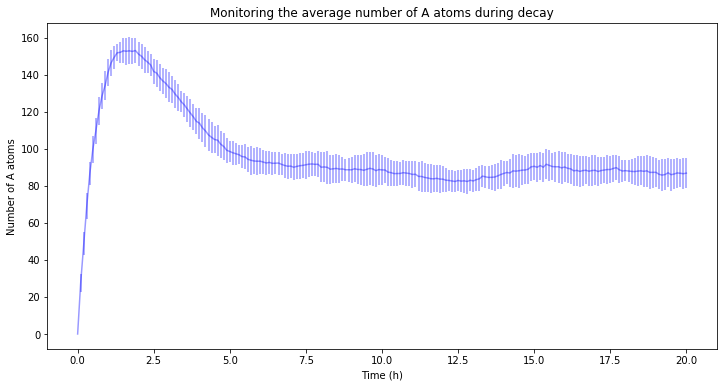

In [56]:
nsim = 20

nsteps = 200 #this defines the number of steps
ts = numpy.linspace(0,nsim,nsteps+1) #this defines the time step in an array

'''This plots a graph of the number of avergae A atoms during decay'''

values = numpy.empty( (nsim,nsteps+1)) #this creates an empty array for the Fr counts
for i in range(nsim):
    A, B, C = evolve_system(0,0,250,rules, nsteps) # this calls the evolve function to calculate the Fr count
    values[i] = A #this adds the Fr count to the values array

averages = numpy.average(values, axis=0) #this calcultaes the avergae value at individual times
uncertainties = numpy.std(values, axis=0) # this calculates the uncertainty using the standard deviation
#is this error?

plt.figure(figsize=(12, 6)) #this defines the size of the graph
plt.errorbar(ts,averages, yerr=uncertainties, color='b', alpha=0.4);
plt.title('Monitoring the average number of A atoms during decay')
plt.xlabel('Time (h)') # this labels the x-axis
plt.ylabel('Number of A atoms')#this labels the y-axis
